In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15144\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the MINMAX Autoencoder dataset

In [7]:
minmaxPCA=pd.read_csv('Autoencoder_MinMaxScaler_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,0.0,0.0495
1,1,0.0,0.0726
2,2,0.0,0.0859
3,3,0.0,0.0783
4,4,0.0,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,0.0,0.0495
1,0.0,0.0726
2,0.0,0.0859
3,0.0,0.0783
4,0.0,0.0767
...,...,...
1551,0.0,393.7880
1552,0.0,386.2650
1553,0.0,379.4510
1554,0.0,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

-0.00046406120622166647


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

-0.0011078604734071629

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

-0.014108671039734011

### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [17]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [18]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=1500,
                          subsample=0.1)

 The best score across ALL searched params:
 -0.003065613052110616

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.1}


### Training the Random forest regression model on the whole dataset

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [20]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [21]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: -0.017794794372988365
Best Score: -0.010642746930909431
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 10}
Loop:  1
--------------
R2 score: -0.011287729426880722
Best Score: -0.010001455947125138
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 10}
Loop:  2
--------------
R2 score: -0.01712017175279268
Best Score: -0.010480434776276004
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}
Loop:  3
--------------
R2 score: -0.013968132229944086
Best Score: -0.010264791711373001
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  4
--------------
R2 score: -0.009061972018876041
Best Score: -0.009509135598050823
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 10}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 170.0445 - mean_absolute_error: 165.5803 - val_loss: 129.3764 - val_mean_absolute_error: 128.1022
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.9790 - mean_absolute_error: 165.5220 - val_loss: 128.1340 - val_mean_absolute_error: 128.0503
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 165.5134 - mean_absolute_error: 165.4695 - val_loss: 128.0305 - val_mean_absolute_error: 128.0004
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 165.4476 - mean_absolute_error: 165.4180 - val_loss: 127.9813 - val_mean_absolute_error: 127.9517
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 165.3981 - mean_absolute_error: 165.3687 - val_loss: 127.9360 - val_mean_absolute_error: 127.9066
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 165.3529 - mean_absolute_error: 165.3236 - val_loss: 127.8951 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 163.7070 - mean_absolute_error: 163.6777 - val_loss: 126.3646 - val_mean_absolute_error: 126.3356
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6713 - mean_absolute_error: 163.6419 - val_loss: 126.3316 - val_mean_absolute_error: 126.3019
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6363 - mean_absolute_error: 163.6069 - val_loss: 126.2983 - val_mean_absolute_error: 126.2688
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6011 - mean_absolute_error: 163.5717 - val_loss: 126.2649 - val_mean_absolute_error: 126.2355
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 163.5661 - mean_absolute_error: 163.5367 - val_loss: 126.2322 - val_mean_absolute_error: 126.2028
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 163.5332 - mean_absolute_error: 163.5038 - val_loss: 126.2012 - va

63/63 [==============================] - 0s 2ms/step - loss: 162.4167 - mean_absolute_error: 162.3873 - val_loss: 125.0897 - val_mean_absolute_error: 125.0603
Epoch 97/100
63/63 [==============================] - 0s 2ms/step - loss: 162.4019 - mean_absolute_error: 162.3725 - val_loss: 125.0747 - val_mean_absolute_error: 125.0455
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3877 - mean_absolute_error: 162.3583 - val_loss: 125.0610 - val_mean_absolute_error: 125.0309
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3728 - mean_absolute_error: 162.3434 - val_loss: 125.0453 - val_mean_absolute_error: 125.0162
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3582 - mean_absolute_error: 162.3288 - val_loss: 125.0309 - val_mean_absolute_error: 125.0015


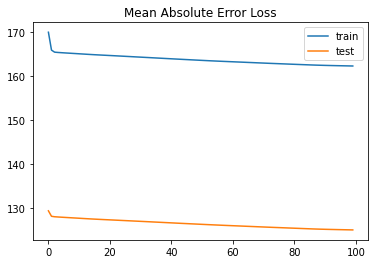

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 170.0921 - mean_absolute_error: 165.5803 - val_loss: 129.3738 - val_mean_absolute_error: 128.1022
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.9826 - mean_absolute_error: 165.5219 - val_loss: 128.1397 - val_mean_absolute_error: 128.0503
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 165.5153 - mean_absolute_error: 165.4694 - val_loss: 128.0309 - val_mean_absolute_error: 128.0005
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 165.4468 - mean_absolute_error: 165.4168 - val_loss: 127.9807 - val_mean_absolute_error: 127.9507
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 165.3971 - mean_absolute_error: 165.3674 - val_loss: 127.9353 - val_mean_absolute_error: 127.9057
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 165.3518 - mean_absolute_error: 165.3221 - val_loss: 127.8942 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 163.7094 - mean_absolute_error: 163.6796 - val_loss: 126.3669 - val_mean_absolute_error: 126.3374
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6742 - mean_absolute_error: 163.6444 - val_loss: 126.3343 - val_mean_absolute_error: 126.3044
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6388 - mean_absolute_error: 163.6091 - val_loss: 126.3010 - val_mean_absolute_error: 126.2714
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 163.6035 - mean_absolute_error: 163.5738 - val_loss: 126.2681 - val_mean_absolute_error: 126.2380
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 163.5688 - mean_absolute_error: 163.5390 - val_loss: 126.2344 - val_mean_absolute_error: 126.2046
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 163.5352 - mean_absolute_error: 163.5054 - val_loss: 126.2020 - va

63/63 [==============================] - 0s 2ms/step - loss: 162.4149 - mean_absolute_error: 162.3852 - val_loss: 125.0882 - val_mean_absolute_error: 125.0584
Epoch 97/100
63/63 [==============================] - 0s 2ms/step - loss: 162.4002 - mean_absolute_error: 162.3704 - val_loss: 125.0733 - val_mean_absolute_error: 125.0434
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3853 - mean_absolute_error: 162.3555 - val_loss: 125.0585 - val_mean_absolute_error: 125.0285
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3708 - mean_absolute_error: 162.3411 - val_loss: 125.0429 - val_mean_absolute_error: 125.0135
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3571 - mean_absolute_error: 162.3274 - val_loss: 125.0300 - val_mean_absolute_error: 125.0000


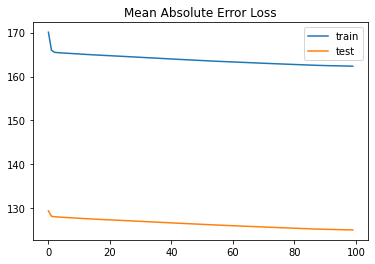

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 19.8431 - mse: 94895.2031 - val_loss: 14.7195 - val_mse: 65642.4688
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 15.7665 - mse: 94895.2188 - val_loss: 13.5183 - val_mse: 65642.4688
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3517 - mse: 94895.2031 - val_loss: 13.4635 - val_mse: 65642.4688
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1875 - val_loss: 13.4629 - val_mse: 65642.4688
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2109 - val_loss: 13.4626 - val_mse: 65642.4688
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2109 - val_loss: 13.4629 - val_mse: 65642.4688
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2031 - val_loss: 13.4625 - val_mse: 65642.4688
Epoch 8/100
6

Epoch 59/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2109 - val_loss: 13.4625 - val_mse: 65642.4688
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.1875 - val_loss: 13.4630 - val_mse: 65642.4688
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2266 - val_loss: 13.4625 - val_mse: 65642.4688
Epoch 62/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2188 - val_loss: 13.4632 - val_mse: 65642.4688
Epoch 63/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2031 - val_loss: 13.4623 - val_mse: 65642.4688
Epoch 64/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2109 - val_loss: 13.4628 - val_mse: 65642.4688
Epoch 65/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3367 - mse: 94895.2188 - val_loss: 13.4627 - val_mse: 65642.4688
Epoch 

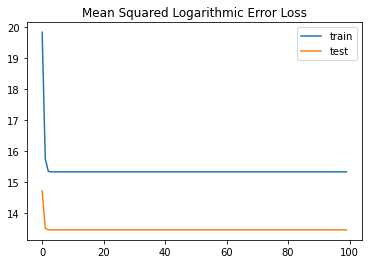

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 94883.7812 - mse: 94880.6797 - val_loss: 65619.8047 - val_mse: 65619.5391
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 94851.3125 - mse: 94851.2578 - val_loss: 65596.7031 - val_mse: 65596.6797
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 94822.1875 - mse: 94822.1641 - val_loss: 65574.1016 - val_mse: 65574.0781
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 94792.7734 - mse: 94792.7266 - val_loss: 65551.5469 - val_mse: 65551.5234
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 94762.9219 - mse: 94762.9062 - val_loss: 65528.5312 - val_mse: 65528.5117
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 94733.2266 - mse: 94733.2031 - val_loss: 65505.7383 - val_mse: 65505.7031
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 94703.6562 - mse: 94703.6406 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 93281.9688 - mse: 93281.9375 - val_loss: 64388.4062 - val_mse: 64388.3711
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 93253.3438 - mse: 93253.3281 - val_loss: 64366.3125 - val_mse: 64366.2930
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 93224.6406 - mse: 93224.6094 - val_loss: 64344.5547 - val_mse: 64344.5312
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 93195.9375 - mse: 93195.9141 - val_loss: 64322.4062 - val_mse: 64322.3789
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 93167.4531 - mse: 93167.4297 - val_loss: 64300.1914 - val_mse: 64300.1602
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 93138.6719 - mse: 93138.6641 - val_loss: 64278.3906 - val_mse: 64278.3633
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 93110.2422 - mse: 93110.

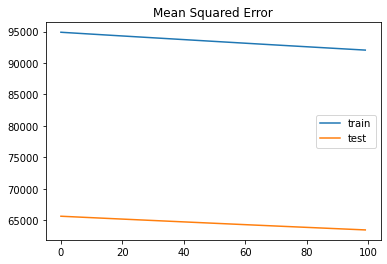

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()